<h1><center>Laboratorio 7: Interpretabilidad ü§ñ</center></h1>

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Pe√±a, Valentina Rojas
- Ayudantes: Nicol√°s Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno 1: Josefa Anselmo.
- Nombre de alumno 2: Tamara Carrasco.


### **Link de repositorio de GitHub:** [TamoJosha](https://github.com/Tamaracarrasco/TamoJosha-Lab-de-Prog-MDS-Prim2025/tree/main)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcci√≥n del laboratorio](#Descripci√≥n-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificaci√≥n usando `XGBoost`.
- M√©todos Agn√≥sticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- M√©todos Agn√≥sticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia ser√° debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no est√©n en u-cursos no ser√°n revisados. Recuerden que el repositorio tambi√©n tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificaci√≥n con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificaci√≥n.

El laboratorio deber√° ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al m√°ximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante m√°s eficientes que los iteradores nativos sobre DataFrames.

In [1]:
# Por mucho problema con compatibilidad de librer√≠a tuve que agregar esto para  que corriera por alibi b√°sicamente que sigue siendo parte de pycaret,
# librer√≠a que ya no mantienen por lo que nos comentaron en clases....

!pip install --quiet --no-cache-dir --no-deps \
    numpy==1.26.4 pandas==2.1.4 scipy==1.11.4 \
    matplotlib==3.7.5 seaborn plotly \
    scikit-learn==1.3.2 imbalanced-learn==0.11.0 \
    xgboost==1.7.6 lightgbm==4.0.0 catboost==1.2.5 \
    pycaret==3.3.2 shap lime alibi \
    jupyterlab notebook umap-learn==0.5.5



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install --upgrade --force-reinstall --no-cache-dir --quiet \
   numpy pandas scikit-learn scipy matplotlib seaborn \
   xgboost lightgbm catboost \
   imbalanced-learn pycaret umap-learn \
   shap lime alibi plotly plotnine xarray \
   Pillow pytz tzdata pyparsing cycler joblib packaging

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.4.9 requires async-lru>=1.0.0, which is not installed.
jupyterlab 4.4.9 requires httpx<1,>=0.25.0, which is not installed.
jupyterlab 4.4.9 requires jupyter-lsp>=2.0.0, which is not installed.
jupyterlab 4.4.9 requires jupyter-server<3,>=2.4.0, which is not installed.
jupyterlab 4.4.9 requires jupyterlab-server<3,>=2.27.1, which is not installed.
jupyterlab 4.4.9 requires notebook-shim>=0.2, which is not installed.
notebook 7.4.7 requires jupyter-server<3,>=2.4.0, which is not installed.
notebook 7.4.7 requires jupyterlab-server<3,>=2.27.1, which is not installed.
notebook 7.4.7 requires notebook-shim<0.3,>=0.2, which is not installed.
ray 2.50.0 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.

[notice] A new release of pip is available

# 1. Problemas Cl√≠nicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades cr√≥nicas, como la diabetes, decidi√≥ abrir una cl√≠nica especializada en el tratamiento de esta enfermedad en nuestro pa√≠s.

La cl√≠nica del Doctor Simi se convirti√≥ en un lugar donde los pacientes con diabetes podr√≠an recibir atenci√≥n m√©dica integral. El personal m√©dico estaba compuesto por especialistas en endocrinolog√≠a, nutrici√≥n y enfermer√≠a, todos capacitados en el manejo de la diabetes.

Sin embargo √©l se ha dado cuenta que los tiempos han cambiado y gracias a las tecnolog√≠as es posible generar mejores predicciones en la diabetes conociendo el historial m√©dico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus cl√≠nicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rog√≥ que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial m√©dico de las personas en forma de datos tabulares para que usted pueda realizar f√°cilmente la clasificaci√≥n.


In [89]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4   8.0  0.0       0.0        1.0  29.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   
3           1.0     1.0      1.0                0.0      3.0       0.0   
4           1.0     1.0      1.0                0.0      2.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0  
1       0.0       0.0     1.0     1.0       0.0  
2      10.0       0.0     0.0     0.0       0.0  
3       3.0       0.0     0.0     1.0       0.0  
4       0.0       0.0     0.0     0.0       0.0

## 2. Clasificaci√≥n de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploraci√≥n de los datos y determine si aplicar√° transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporci√≥n de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el par√°metro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el m√©todo `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempe√±o del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¬øEs acaso un buen predictor de diabetes? (0.5 puntos)
  * ¬øQu√© buscan explicar las m√©tricas utilizadas? (0.5 puntos)
  * ¬øLas m√©tricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elecci√≥n de las features?(0.5 puntos)

In [67]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [68]:
# Inserte su c√≥digo aqu√≠

### importaci√≥n de librer√≠as importantes

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Holdout 
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder

# Modelo
import xgboost as xgb
from xgboost import XGBClassifier

# M√©tricas
from sklearn.metrics import classification_report

In [90]:
## Exploraci√≥n de los datos

# Dimensi√≥n
print(" Dimensiones del dataset: ", df.shape)

# Columnas
print("="*40)
print("Columnas num√©ricas: \n", df.select_dtypes(include="number").columns.tolist())
print("\n Columnas tipo category u object: ", df.select_dtypes(include=[
    "object", "category"
                        ]
                ).columns.tolist()
    )

# Valores duplicados
print("="*40)
print(" Valores duplicados en todas las columnas: ", df.duplicated().sum())

# Valores nulos
print("="*40)
print(df.info())

# Estad√≠sticas descriptivas de variables num√©ricas
print("\nEstad√≠sticas descriptivas:")
df.describe()

# Conteo de valores √∫nicos por columna (√∫til para detectar categ√≥ricas)
print("\nValores √∫nicos por columna:")
df.nunique()

 Dimensiones del dataset:  (70692, 18)
Columnas num√©ricas: 
 ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']

 Columnas tipo category u object:  []
 Valores duplicados en todas las columnas:  6672
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits  

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

In [91]:
# Elimino registros duplicados

df = df.drop_duplicates()

print(f"Total de filas finales: {df.shape}")

Total de filas finales: (64020, 18)


In [92]:
## ¬øHay desbalance de clases?
df["Diabetes"].value_counts()

Diabetes
1.0    33398
0.0    30622
Name: count, dtype: int64

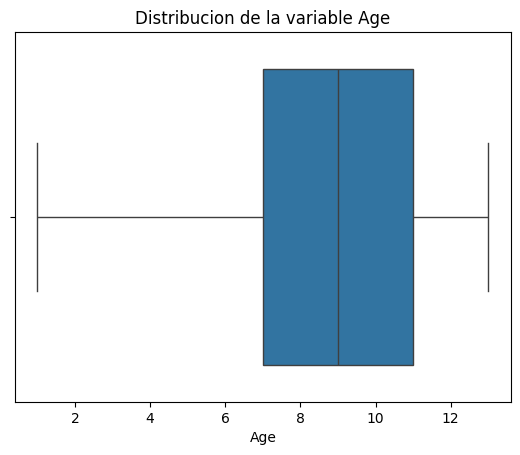

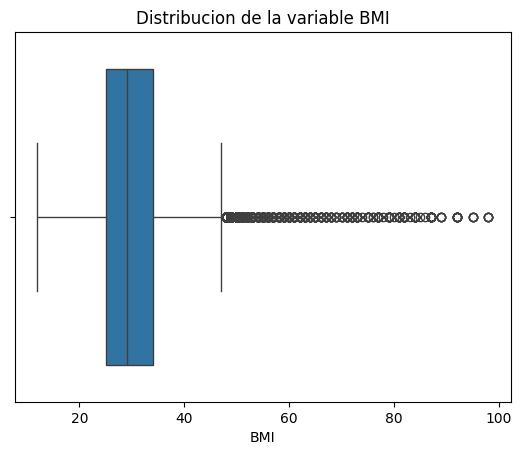

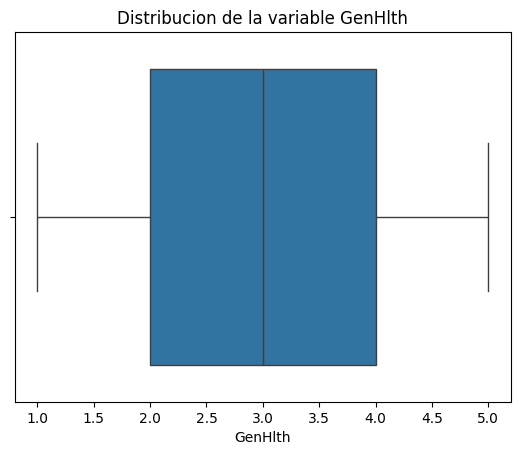

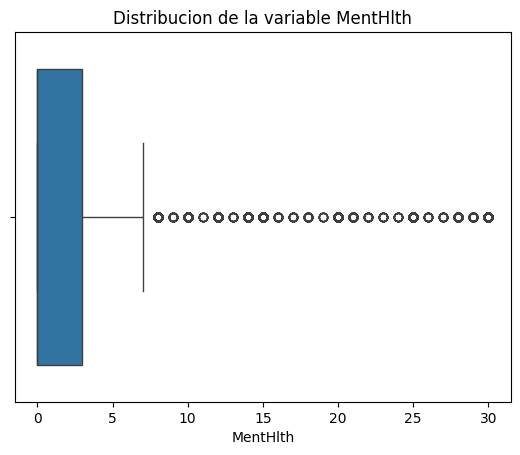

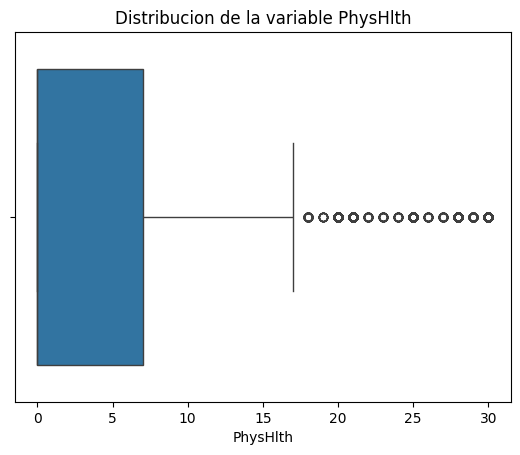

In [93]:
# Columnas binarias

binarias = ['Sex',
 'HighChol',
 'CholCheck',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'DiffWalk',
 'Stroke',
 'HighBP',
 'Diabetes']

num_cols = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']


for i in num_cols:
    plt.figure()
    plt.clf()
    plt.title(f"Distribucion de la variable {i}")
    plt.xlabel(f"{i}")
    sns.boxplot(data=df, x=i)
    plt.show()

In [94]:
# Variables binarias tabla

binarias_ok = [c for c in binarias if c in df.columns]

# Crear tabla con cantidad de 0 y 1
tabla_bin = (
    df[binarias_ok]
    .apply(lambda s: s.value_counts())
    .T
    .fillna(0)
    .astype(int)
    .rename(columns={0: "n_0", 1: "n_1"})
)

# Totales y proporci√≥n de 1
tabla_bin["n_total"] = tabla_bin["n_0"] + tabla_bin["n_1"]
tabla_bin["pct_1"] = (tabla_bin["n_1"] / tabla_bin["n_total"]).round(3)

# Ordenar por proporci√≥n de 1
tabla_bin = tabla_bin.sort_values("pct_1", ascending=False)

# Mostrar resultado
tabla_bin

n_0    n_1  n_total  pct_1
CholCheck              1715  62305    64020  0.973
Veggies               14623  49397    64020  0.772
PhysActivity          20591  43429    64020  0.678
Fruits                26193  37827    64020  0.591
HighBP                26776  37244    64020  0.582
HighChol              29478  34542    64020  0.540
Diabetes              30622  33398    64020  0.522
Smoker                32605  31415    64020  0.491
Sex                   34828  29192    64020  0.456
DiffWalk              46286  17734    64020  0.277
HeartDiseaseorAttack  53780  10240    64020  0.160
Stroke                59634   4386    64020  0.069
HvyAlcoholConsump     61053   2967    64020  0.046

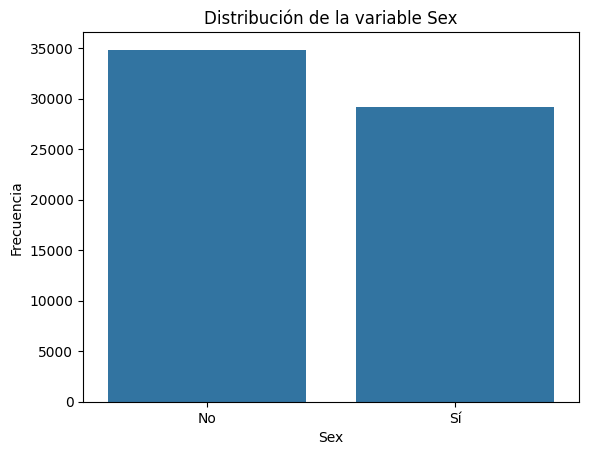

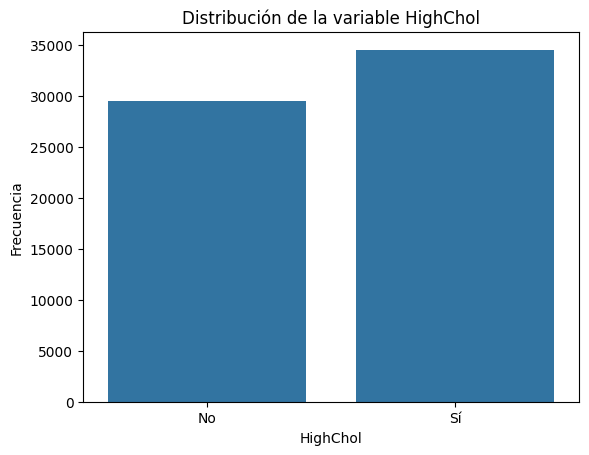

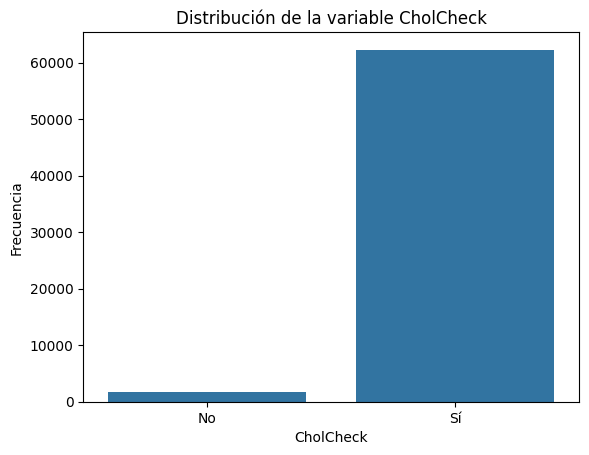

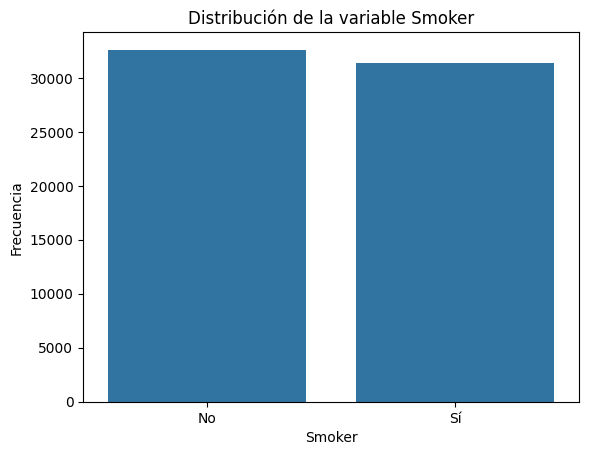

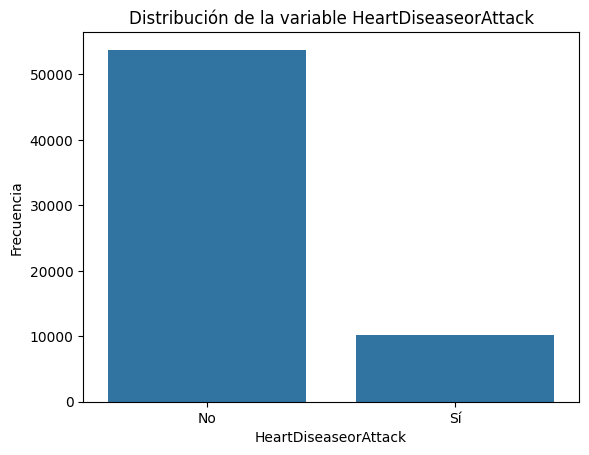

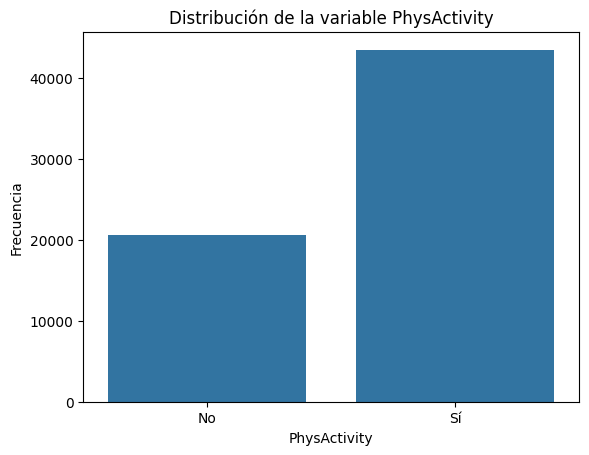

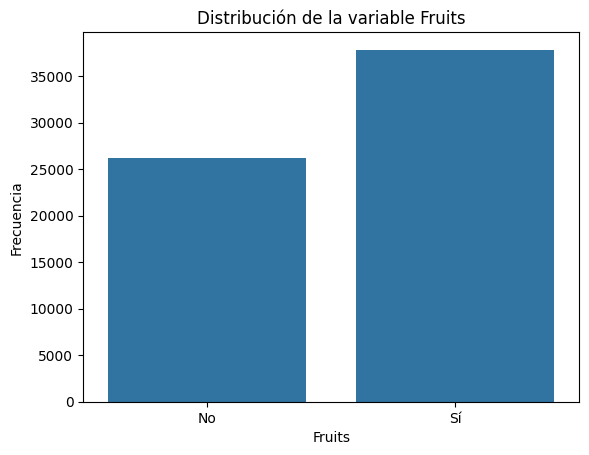

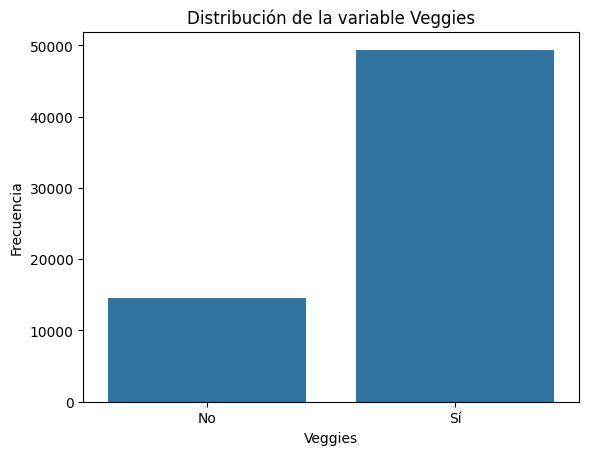

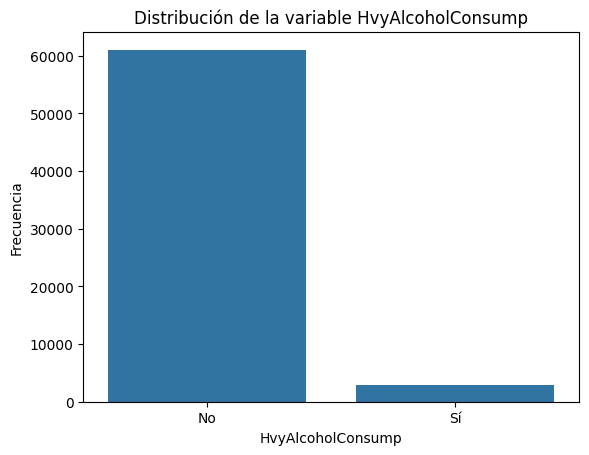

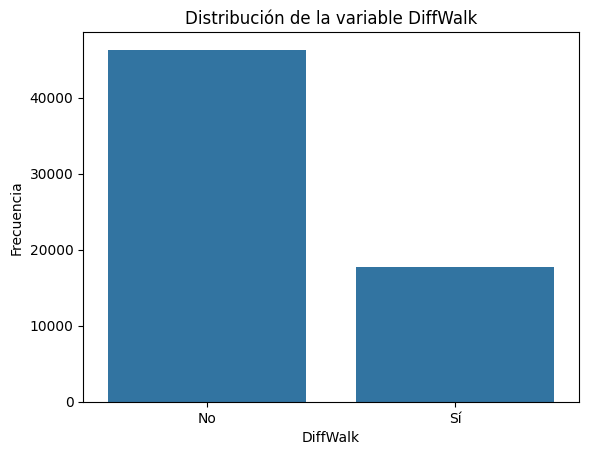

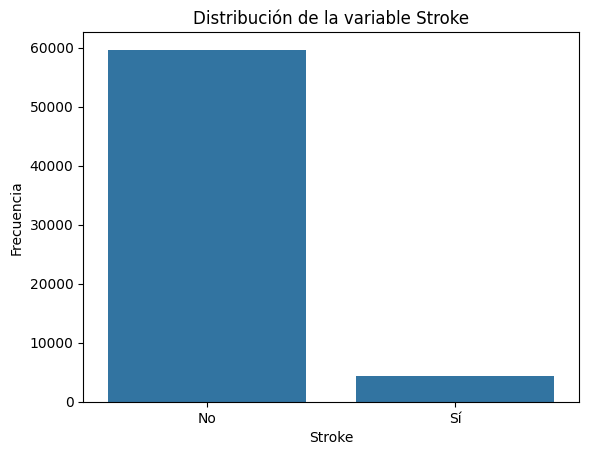

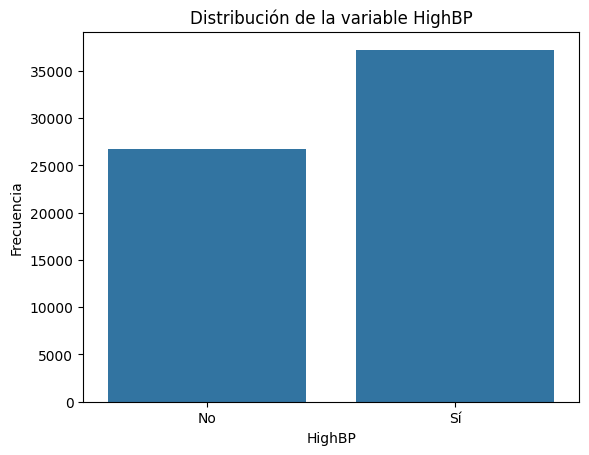

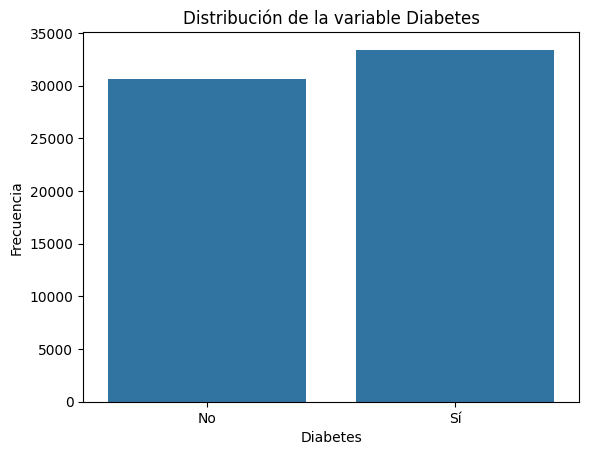

In [95]:
# Variables binarias plot

for col in binarias:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f"Distribuci√≥n de la variable {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks([0, 1], ["No", "S√≠"])
    plt.show()

                variable        VIF
3              CholCheck  23.315805
4                    BMI  16.271293
11               GenHlth  13.301412
0                    Age  11.370191
9                Veggies   4.543031
7           PhysActivity   3.323853
16                HighBP   3.152070
17              Diabetes   2.819976
8                 Fruits   2.630581
2               HighChol   2.533812
13              PhysHlth   2.271169
14              DiffWalk   2.087986
5                 Smoker   2.069704
1                    Sex   1.915425
12              MentHlth   1.513372
6   HeartDiseaseorAttack   1.407847
15                Stroke   1.168535
10     HvyAlcoholConsump   1.072284


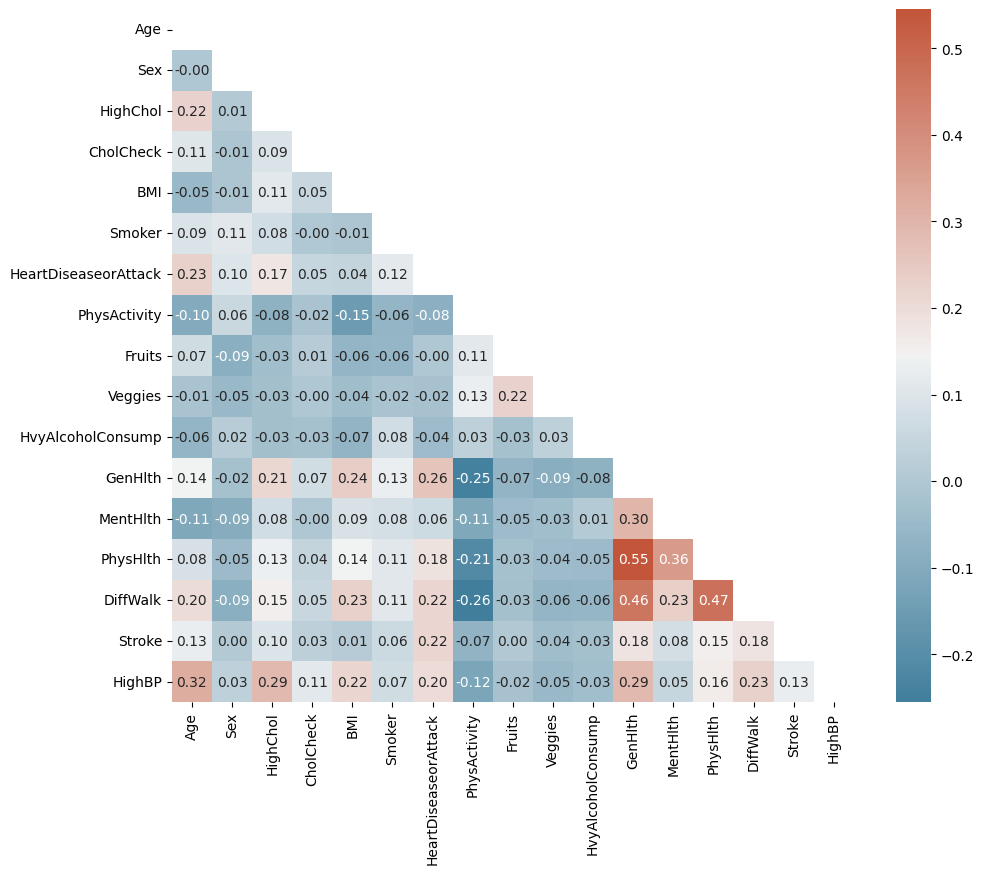

In [98]:
# Heatmap

corr = df.select_dtypes(include="number").drop(columns=
                                                    [
                                                    "Diabetes"
                                                    ]
                                                    ).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Figura
figure, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f")

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Subconjunto de variables num√©ricas (sin el target)
X_vif = df

vif = pd.DataFrame()
vif["variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif.sort_values("VIF", ascending=False))



In [99]:
## PUNTO 2: creaci√≥n de los dataset de entrenamiento y prueba.

df_x = df.drop(columns="Diabetes").copy()
df_y = df["Diabetes"]

# hay un desbalance leve pero igual usaremos stratify.

X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, random_state=42, test_size=0.33, shuffle=True, stratify=df_y
)

In [115]:
# PUNTO 3: Creaci√≥n de condiciones + column transformer:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer, RobustScaler

# Custom Winsorizer (aprende p1/p99 en fit para evitar leakage)
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, p_low=0.01, p_high=0.99):
        self.p_low = p_low
        self.p_high = p_high

    def fit(self, X, y=None):
        self._was_df_ = hasattr(X, "iloc")
        if self._was_df_:
            self._cols_ = list(X.columns)
            self._index_ = X.index 

        X_arr = np.asarray(X, dtype=float)
        if X_arr.ndim == 1:
            X_arr = X_arr.reshape(-1, 1)

        self.low_  = np.nanpercentile(X_arr, self.p_low  * 100, axis=0)
        self.high_ = np.nanpercentile(X_arr, self.p_high * 100, axis=0)
        return self

    def transform(self, X):
        was_df = hasattr(X, "iloc")
        idx = X.index if was_df else None
        cols = list(X.columns) if was_df else None

        X_arr = np.asarray(X, dtype=float)
        if X_arr.ndim == 1:
            X_arr = X_arr.reshape(-1, 1)

        X_clip = np.clip(X_arr, self.low_, self.high_)

        if was_df:
            return pd.DataFrame(X_clip, index=idx, columns=cols)
        return X_clip

    def set_output(self, *, transform=None):
        return self
    
    def get_feature_names_out(self, input_features=None):
        if input_features is not None:
            import numpy as np
            return np.asarray(input_features, dtype=object)
        return np.asarray(getattr(self, "_cols_", ["BMI"]), dtype=object)

# Listas seg√∫n las decisiones definidas antes
binarias = [
    "Sex","HighChol","Smoker","HeartDiseaseorAttack","PhysActivity",
    "Fruits","Veggies","HvyAlcoholConsump","DiffWalk","Stroke","HighBP"
]
# No usamos GenHlth; tampoco CholCheck por lo que se epxlico
ordinales = ["Age"]
bmi_col   = ["BMI"]
ment_phys = ["MentHlth","PhysHlth"]

# Pipelines por rama de BMI y de Ment y Phys
bmi_pipe = Pipeline([
    ("winsor", Winsorizer(0.01, 0.99)),
    ("scale",  RobustScaler())
])

ment_phys_pipe = Pipeline([
    ("log1p",  FunctionTransformer(np.log1p, validate=False)),
    ("scale",  RobustScaler())
])

# ColumnTransformer considerando todo lo definido
col_transformer = ColumnTransformer(
    transformers=[
        ("bmi",        bmi_pipe,       bmi_col),       # BMI: winsor + robust
        ("ment_phys",  ment_phys_pipe, ment_phys),     # Ment/Phys: log1p + robust
        ("pass_bin",   "passthrough",  binarias),      # binarios los dejamos sin escalar
        ("pass_age",   "passthrough",  ordinales),     # Age queda sin escalar -> estoy lo otro pq preferimos la interpetabilidad
    ],
    remainder="drop",                 # descarta CholCheck, GenHlth y cualquier otra no listada por lo que definimos antes en base al analisis exploratorio
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [116]:
# PUNTO 4: Pipeline del modelo

from sklearn.metrics import classification_report
from xgboost import XGBClassifier


# Modelo XGBoost coherente y estable
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
   # tree_method="gpu_hist",      # usa "gpu_hist" si tienes GPU
    random_state=7734,
    n_jobs=-1
)

# Pipeline final del preprocesamiento considerando el col_transformer + modelo definido de xgb
xgb_pipeline = Pipeline(
    steps=[
        ("pre", col_transformer),
        ("xgb", xgb)
    ]
)

# Entrenamiento
xgb_pipeline.fit(X_train, y_train)

# Predicciones
y_pred_tr = xgb_pipeline.predict(X_train)
y_pred_te = xgb_pipeline.predict(X_test)

# Reportes
print("=== M√©tricas en TRAIN ===")
print(classification_report(y_train, y_pred_tr, digits=3))

print("\n=== M√©tricas en TEST ===")
print(classification_report(y_test, y_pred_te, digits=3))

=== M√©tricas en TRAIN ===
              precision    recall  f1-score   support

         0.0      0.770     0.700     0.733     20517
         1.0      0.746     0.809     0.776     22376

    accuracy                          0.757     42893
   macro avg      0.758     0.754     0.755     42893
weighted avg      0.758     0.757     0.756     42893


=== M√©tricas en TEST ===
              precision    recall  f1-score   support

         0.0      0.725     0.662     0.692     10105
         1.0      0.713     0.770     0.740     11022

    accuracy                          0.718     21127
   macro avg      0.719     0.716     0.716     21127
weighted avg      0.719     0.718     0.717     21127



**COMENTARIOS PUNTO 1**

**DECISIONES**

En esta etapa del preprocesamiento se eliminaron y ajustaron variables siguiendo criterios t√©cnicos y estad√≠sticos:

Durante la etapa de exploraci√≥n inicial del conjunto de datos, se realiz√≥ un an√°lisis descriptivo y gr√°fico con el objetivo de comprender la estructura y las caracter√≠sticas de las variables antes de aplicar cualquier modelo.

En primer lugar, se verific√≥ que la dimensi√≥n del dataset (70692, 18), donde no existen valores nulos pero si varios duplicados (6672 dropeados con nuevas dimensiones igual a (64020, 18)) por lo que eliminaremos los registros duplicados. Luego se revisaron los tipos de datos y todas las variables aparec√≠an como `float64`, cuando la mayor√≠a correspond√≠a a variables binarias (0/1) que no necesariamente representaban un n√∫mero float. Estas fueron tipificadas a enteros para evitar decimales y asegurar una correcta interpretaci√≥n por parte del modelo (manteniendo tambi√©n el orden).

Posteriormente, se generaron estad√≠sticas descriptivas y distribuciones. Se observ√≥ que las variables binarias (como `HighBP`, `Smoker`, `PhysActivity`, etc.) presentaban proporciones razonablemente balanceadas, con excepci√≥n de `CholCheck`, que mostraba un valor de 1 en el 97 % de los casos, evidenciando una baja variabilidad y justificando su exclusi√≥n.

Las variables continuas (`BMI`, `MentHlth`, `PhysHlth`) mostraron colas largas y presencia de outliers, particularmente en `BMI`. Se aplic√≥ winsorizaci√≥n (1 %) sobre `BMI` para atenuar el impacto de valores extremos y se realizaron transformaciones logar√≠tmicas (`np.log1p`) sobre `MentHlth` y `PhysHlth` para suavizar su asimetr√≠a.

Asimismo, se analiz√≥ la correlaci√≥n entre variables mediante una matriz de calor y el c√°lculo del VIF (Variance Inflation Factor). Esto permiti√≥ detectar colinealidades altas en `GenHlth` y `CholCheck`, que fueron descartadas por redundancia. El resto de variables mostr√≥ VIF inferiores a 5, lo que confirma una baja redundancia entre predictores.

Verificamos el balance de clases en la variable objetivo `Diabetes`, observ√°ndose una distribuci√≥n equilibrada (~52 % positivos y ~48 % negativos). En conjunto, esta exploraci√≥n permiti√≥ definir un conjunto de predictores limpios, sin colinealidad severa, con escalado robusto en las variables continuas y adecuadamente preparados para el entrenamiento del modelo `XGBoost`.

**Justificaciones particulares de las decisiones**

1. *Eliminaci√≥n de CholCheck:*
Esta variable presentaba un nivel de homogeneidad extremo (97,3 % de observaciones con valor = 1), lo que implica una baja varianza y nulo poder predictivo. Adem√°s, generaba un VIF ‚âà 24, evidenciando colinealidad redundante con otras variables de salud general. Mantenerla solo a√±adir√≠a ruido sin aportar informaci√≥n al modelo, por lo que se elimin√≥ del conjunto de entrenamiento.

2. *Windsorizacion de BMI:*
El √≠ndice de masa corporal mostraba m√∫ltiples valores at√≠picos en los percentiles superiores (outliers > 50). Para mitigar su impacto sin alterar la estructura de la variable, se aplic√≥ una winsorizaci√≥n leve (1 %), generando BMI_winsor. Esta versi√≥n conserva la distribuci√≥n central del indicador, pero reduce la influencia de observaciones extremas en los splits de XGBoost.

3. *Transformaciones logar√≠tmicas en MentHlth y PhysHlth:*
Ambas variables (d√≠as de mala salud mental/f√≠sica) presentan una distribuci√≥n fuertemente sesgada hacia 0, con una larga cola hasta 30 d√≠as. Se aplic√≥ np.log1p() para estabilizar la varianza y suavizar la asimetr√≠a, permitiendo que el modelo distinga mejor entre niveles moderados y altos de afectaci√≥n sin sobreponderar los valores extremos.

4. *Exclusi√≥n de GenHlth por redundancia conceptual:*
GenHlth sintetiza el estado de salud general percibido y mostr√≥ alta colinealidad con MentHlth_log, PhysHlth_log, DiffWalk y HighBP (VIF ‚âà 13). Dado que estas √∫ltimas capturan componentes espec√≠ficos y medibles del bienestar, se privilegi√≥ su inclusi√≥n directa, eliminando GenHlth para evitar duplicidad de informaci√≥n y mejorar la interpretabilidad del modelo.

**RESULTAODS**

- *Desempe√±o general*: El modelo alcanza un accuracy 0.718 en TEST (0.757 en TRAIN), con un F1 de la clase 1 = 0.740 en TEST (0.776 en TRAIN). La ca√≠da moderada entre TRAIN y TEST sugiere sobreajuste leve, pero generaliza razonablemente.

- *Clase positiva (diabetes):* En TEST, entrega un recall = 0.770 y una precision = 0.713. Es decir, el modelo detecta ~77% de los casos con diabetes, a costa de que ~29% de los positivos predichos sean falsos positivos. Para un contexto de screening, este equilibrio es aceptable y puede ajustarse seg√∫n el costo cl√≠nico de los errores.

- *Clase negativa:* En TEST, la clase 0 tiene un recall = 0.662, lo que refleja que el modelo tiende a ser m√°s sensible (privilegia capturar positivos) y sacrifica algo de especificidad (m√°s falsos positivos).

- *Macro/weighted:* Los promedios macro y ponderado ~0.716‚Äì0.719 confirman un rendimiento parejo entre clases (el dataset est√° casi balanceado), aunque la prioridad cl√≠nica podr√≠a llevarnos a optimizar el umbral para elevar a√∫n m√°s el recall de la clase 1.

- *Siguiente paso recomendado:* Ajustar el umbral de decisi√≥n con la curva Precision‚ÄìRecall para fijar un recall objetivo (p. ej., ‚â•0.80‚Äì0.85 si la meta es minimizar falsos negativos) y re-reportar precision/recall/F1 en ese umbral; complementar con importancias/SHAP para justificar variables dominantes.


### Respuesta a las preguntas de an√°lisis.
1. *¬øEs acaso un buen predictor de diabetes?*

    **R:** S√≠, es razonablemente bueno, con leve sobreajuste y margen de mejora en recall. Podemos ver que en TRAIN el modelo logra accuracy 0.757 y, para la clase positiva, precision/recall/F1 = 0.746 / 0.809 / 0.776. En TEST obtiene accuracy 0.718 y, para la clase positiva, precision/recall/F1 = 0.713 / 0.770 / 0.740. La ca√≠da moderada de desempe√±o entre TRAIN y TEST indica sobreajuste leve, pero el modelo generaliza razonablemente (brecha acotada).Dado que el set est√° casi balanceado (TEST: 10.105 ‚Äú0‚Äù vs 11.022 ‚Äú1‚Äù), accuracy es informativo pero no suficiente en un problema de salud. Para screening interesa especialmente el recall de la clase 1 (evitar falsos negativos). El modelo alcanza recall=0.77 en TEST (detecta ~77% de casos con diabetes), con precision=0.713 (alrededor del 29% de los positivos predichos no tendr√≠an la condici√≥n). Entonces, este modelo es un buen punto de partida, √∫til para priorizaci√≥n/derivaci√≥n, pero podr√≠a ajustarse el umbral para elevar el recall si la pol√≠tica cl√≠nica lo requiere, asumiendo m√°s falsos positivos.

2. *¬øQu√© buscan explicar las m√©tricas utilizadas?*

    **R:** 
    - *Precision (clase 1):* de los casos que el modelo predijo como ‚Äúdiabetes‚Äù, qu√© proporci√≥n realmente lo es (controla falsos positivos).
    - *Recall/Sensibilidad (clase 1):* de los casos que s√≠ ten√≠an diabetes, qu√© proporci√≥n detecta el modelo (controla falsos negativos).
    - *F1 (clase 1):* promedio arm√≥nico entre precision y recall; resume el trade-off cuando ambas importan.
    - *Accuracy:* proporci√≥n total de aciertos; con clases cercanas a 50/50 aporta contexto, pero no captura bien el costo asim√©trico de errores.
    - *Macro avg:* promedio simple entre clases (trata por igual a 0 y 1).
    - *Weighted avg:* promedio ponderado por soporte (se acerca al comportamiento global observando el tama√±o de cada clase).

3. *¬øLas m√©tricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elecci√≥n de las features?*

    **R:** No. Las m√©tricas reportadas eval√∫an el rendimiento predictivo global del modelo, pero no informan sobre la calidad ni la necesidad de cada feature. Para juzgar la contribuci√≥n de las variables se requieren an√°lisis adicionales, como por ejemplo estimar importancias por ganancia en XGBoost y, para mayor robustez fuera de muestra, usar permutation importance; complementar con explicaciones locales y globales (SHAP) para identificar qu√© atributos empujan cada predicci√≥n hacia 1 o 0; realizar pruebas de ablaci√≥n (quitar/a√±adir variables) y validar la estabilidad de resultados en validaci√≥n cruzada; y controlar colinealidad, podando variables con ganancia cercana a cero. Como recomendaci√≥n pr√°ctica, conviene calibrar el umbral mediante la curva Precision‚ÄìRecall para fijar un objetivo de recall (por ejemplo, ‚â•0.85 si se prioriza minimizar falsos negativos) y, en ese nuevo umbral, volver a reportar precision/recall/F1 y revisar importancias/SHAP para justificar cl√≠nicamente las variables dominantes.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para a√±adir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los m√©todos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el m√©todo `.named_steps[...]` (3 puntos)
2. ¬øLos resultados obtenidos con los diferentes m√©todos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¬ølas importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza √°rboles? ¬øQu√© debilidad presenta este m√©todo? (1 punto)

feature  importance
13                HighBP   69.712059
4               HighChol   15.570233
11              DiffWalk   14.568638
6   HeartDiseaseorAttack    8.129115
0                    BMI    7.011868
14                   Age    6.775051
10     HvyAlcoholConsump    6.708278
12                Stroke    3.564064
3                    Sex    3.501861
2               PhysHlth    3.233873

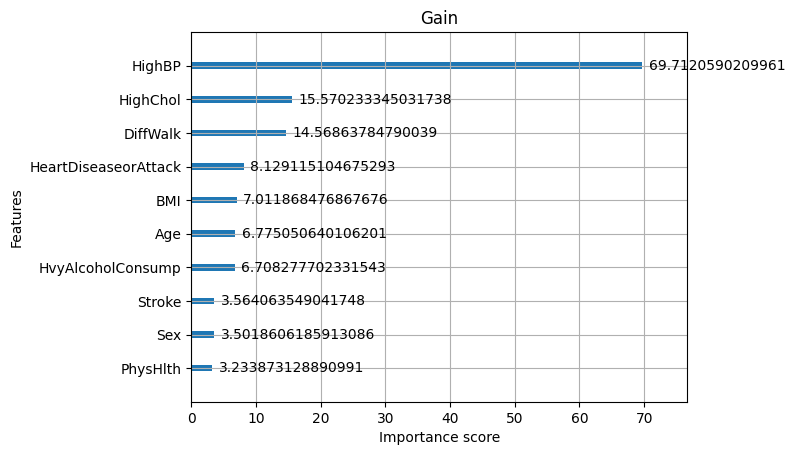

feature  importance
0            BMI      4769.0
14           Age      3596.0
2       PhysHlth      3355.0
1       MentHlth      3041.0
5         Smoker       891.0
3            Sex       881.0
8         Fruits       848.0
4       HighChol       805.0
7   PhysActivity       801.0
9        Veggies       764.0

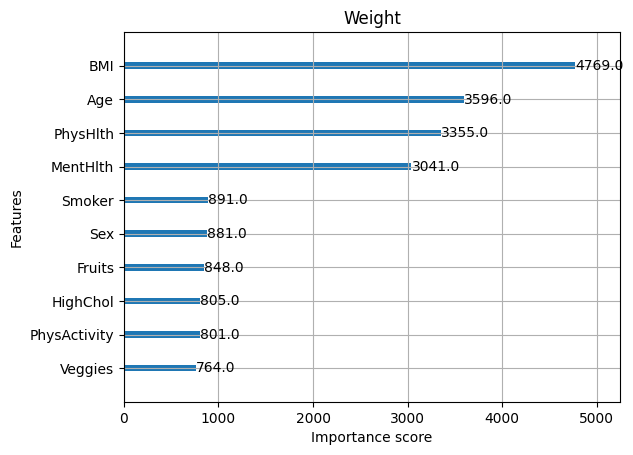

feature   importance
10     HvyAlcoholConsump  1067.794312
0                    BMI   946.021912
13                HighBP   945.336792
12                Stroke   920.392700
4               HighChol   886.169556
6   HeartDiseaseorAttack   806.707031
14                   Age   772.053894
1               MentHlth   716.410156
2               PhysHlth   702.745667
11              DiffWalk   647.983093

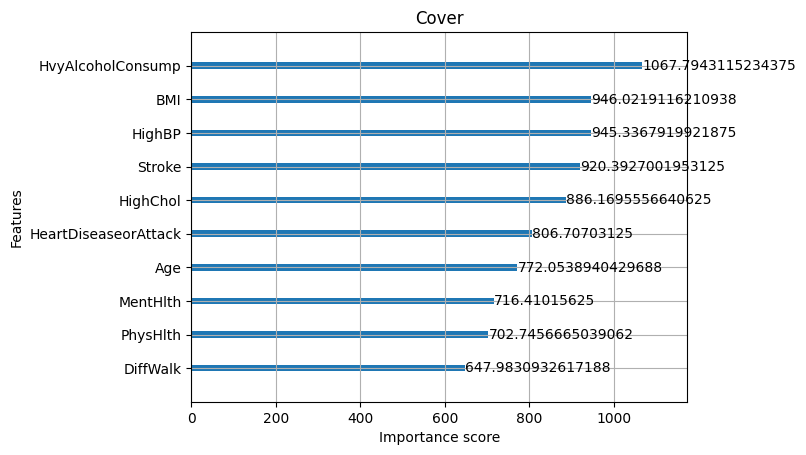

In [ ]:
# Inserte su c√≥digo aqu√≠
import xgboost as xgb # Vuelvo a descarga popr choque de nombre con una definicon al momento de definir mi modelo

####  PUNTO 1

pre   = xgb_pipeline.named_steps["pre"]
model = xgb_pipeline.named_steps["xgb"]

Xt = pre.transform(X_train)          
feature_names = Xt.columns.tolist()

booster = model.get_booster()
booster.feature_names = feature_names

#Graficos

# GAIN
imp_gain = booster.get_score(importance_type="gain")
imp_gain_df = (pd.DataFrame.from_dict(imp_gain, orient="index", columns=["importance"])
               .rename_axis("feature").reset_index()
               .sort_values("importance", ascending=False))
display(imp_gain_df.head(10))
xgb.plot_importance(booster, importance_type="gain", max_num_features=10); plt.title("Gain"); plt.show()

# WEIGHT
imp_weight = booster.get_score(importance_type="weight")
imp_weight_df = (pd.DataFrame.from_dict(imp_weight, orient="index", columns=["importance"])
                 .rename_axis("feature").reset_index()
                 .sort_values("importance", ascending=False))
display(imp_weight_df.head(10))
xgb.plot_importance(booster, importance_type="weight", max_num_features=10); plt.title("Weight"); plt.show()

# COVER
imp_cover = booster.get_score(importance_type="cover")
imp_cover_df = (pd.DataFrame.from_dict(imp_cover, orient="index", columns=["importance"])
                .rename_axis("feature").reset_index()
                .sort_values("importance", ascending=False))
display(imp_cover_df.head(10))
xgb.plot_importance(booster, importance_type="cover", max_num_features=10); plt.title("Cover"); plt.show()


### Respuestas a las preguntas de an√°lisis.

2. *¬øLos resultados obtenidos con los diferentes m√©todos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.*

    **R:** S√≠ hay coherencia general entre los tres m√©todos, pero no son id√©nticos porque miden cosas distintas. En el modelo definido, ‚Äúgain‚Äù se√±ala a HighBP como la variable m√°s determinante pues es la que, cuando aparece en los splits, m√°s reduce la p√©rdida en promedio; detr√°s quedan HighChol, DiffWalk, HeartDiseaseorAttack, BMI y Age. En cambio, cuando graficamos por ‚Äúweight‚Äù este prioriza a BMI y Age, seguidas por PhysHlth y MentHlth, porque cuentan cu√°ntas veces se usan en divisiones a lo largo de todos los √°rboles; las continuas con muchos puntos de corte tienden a aparecer mucho aunque cada uso no siempre aporte gran mejora. Y al graficar por ‚Äúcover‚Äù vemos que destaca HvyAlcoholConsump, BMI y HighBP, ya que valora cu√°ntas muestras quedan afectadas por los splits donde interviene la variable; un split puede cubrir a muchos registros y, aun as√≠, no tener un gain muy alto. 
    Las diferencias esperadas entre rankings se explican por 3 razones principales:
     (i) el criterio de cada m√©trica (calidad del split vs. frecuencia de uso vs. cobertura).
     (ii) la presencia de correlaci√≥n entre predictores, que ‚Äúreparte‚Äù la importancia. -> esto lo intentamos disminuir pues aplicamos deciisones en base a correlaci√≥n.
     (iii) el sesgo natural de weight/cover hacia variables con mayor cardinalidad. Por eso hablamos de compatibilidad parcial: las se√±ales fuertes se repiten (BMI, Age, HighBP, HighChol), pero el orden y la ‚Äúdominancia‚Äù cambian seg√∫n la √≥ptica de cada m√©trica.

3. *Finalmente, ¬ølas importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza √°rboles? ¬øQu√© debilidad presenta este m√©todo?* 

    **R:** Las importancias globales de XGBoost (gain, weight y cover) son √∫tiles para una interpretaci√≥n de alto nivel, pero no bastan para lograr interpretabilidad completa en modelos de √°rboles. Indican relevancia agregada, pero no la direcci√≥n del efecto ni la magnitud del impacto sobre la probabilidad (no dicen si m√°s BMI sube o baja el riesgo, ni c√≥mo var√≠a a lo largo del rango), son sensibles a colinealidad e interacciones (la se√±al se puede repartir entre variables correlacionadas), tienden a favorecer a variables con muchos posibles puntos de corte (especialmente en weight y cover) y no explican casos individuales. Para una interpretaci√≥n s√≥lida y accionable conviene complementarlas con SHAP (TreeSHAP) para direcci√≥n y magnitud global y local, permutation importance en validaci√≥n para robustez fuera de muestra, y curvas de dependencia parcial/ICE para visualizar la relaci√≥n funcional entre cada predictor y la predicci√≥n. Con ese combo puedes justificar cl√≠nicamente qu√© variables dominan, en qu√© sentido lo hacen y por qu√© el modelo tom√≥ decisiones espec√≠ficas en pacientes concretos.

## 4. M√©todos Agn√≥sticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la secci√≥n anterior, Dr. Simi le pide implementar un **m√©todo de permutaci√≥n** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este m√©todo. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el m√©todo `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviaci√≥n est√°ndar de sus resultados (¬øQu√© se√±ala esta?). (2 puntos)
3. Visualice los resultados de este m√©todo en un gr√°fico. (2 puntos)
4. Adem√°s, responda las siguientes preguntas:
  - ¬øC√≥mo mide la importancia de las features su propuesta? (1 punto)
  - ¬øQu√© features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¬øtienen sentido? (1 punto)
  - ¬øC√≥mo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del m√©todo implementado. (1 punto)

feature      mean       std
0                    BMI  0.035926  0.002238
1                    Age  0.026743  0.001686
2                 HighBP  0.025980  0.001537
3               HighChol  0.011216  0.001306
4   HeartDiseaseorAttack  0.005459  0.000767
5      HvyAlcoholConsump  0.005364  0.000813
6                    Sex  0.002746  0.001011
7               PhysHlth  0.002087  0.000982
8               DiffWalk  0.001408  0.000989
9                 Smoker  0.000641  0.000596
10          PhysActivity  0.000369  0.000668
11                Stroke  0.000180  0.000607
12               Veggies  0.000140  0.000623
13                Fruits -0.000012  0.000482
14              MentHlth -0.000898  0.000613

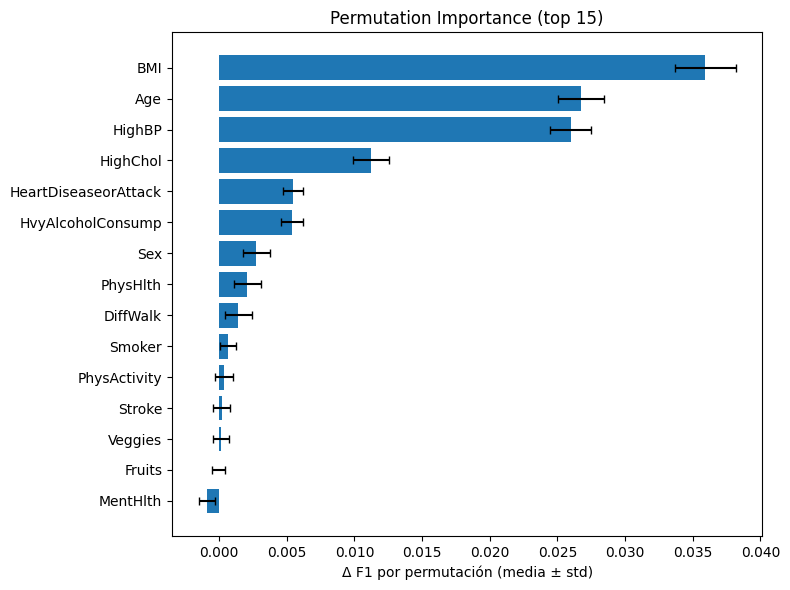

In [128]:
# Inserte su c√≥digo aqu√≠

from sklearn.inspection import permutation_importance

# Matriz que ve el booster (orden correcto) + nombres
Xt = pre.transform(X_test)                     # DataFrame (set_output='pandas')
feat = model.get_booster().feature_names or Xt.columns.tolist()
yte  = y_test.astype(int)

# Permutation importance (30 repeticiones)
res = permutation_importance(model, Xt, yte, scoring="f1",
                             n_repeats=30, random_state=42, n_jobs=-1)

# Tabla ordenada
perm = (pd.DataFrame({"feature": feat,
                      "mean": res.importances_mean,
                      "std":  res.importances_std})
        .sort_values("mean", ascending=False).reset_index(drop=True))
display(perm.head(15))

# Gr√°fico simple: barras con error (top-15)
topk = min(15, len(perm))
plot = perm.head(topk).iloc[::-1]  # invertimos para barh
plt.figure(figsize=(8,6))
plt.barh(plot["feature"], plot["mean"], xerr=plot["std"], capsize=3)
plt.xlabel("Œî F1 por permutaci√≥n (media ¬± std)")
plt.title(f"Permutation Importance (top {topk})")
plt.tight_layout()
plt.show()


In [130]:
res

{'importances_mean': array([ 3.59259916e-02, -8.97942348e-04,  2.08676199e-03,  2.74646837e-03,
         1.12158481e-02,  6.41377985e-04,  5.45899537e-03,  3.68591049e-04,
        -1.23397352e-05,  1.40001504e-04,  5.36375638e-03,  1.40847116e-03,
         1.80266183e-04,  2.59802415e-02,  2.67425472e-02]),
 'importances_std': array([0.00223783, 0.00061333, 0.00098174, 0.00101064, 0.00130551,
        0.00059642, 0.00076693, 0.00066773, 0.00048152, 0.0006228 ,
        0.00081317, 0.00098915, 0.00060669, 0.00153659, 0.00168584]),
 'importances': array([[ 4.06722193e-02,  3.25782998e-02,  3.50580263e-02,
          3.53594260e-02,  3.82710870e-02,  3.52396264e-02,
          3.44044203e-02,  3.39093625e-02,  3.35625918e-02,
          3.88292453e-02,  3.61702177e-02,  3.71232056e-02,
          3.56373123e-02,  3.57751706e-02,  3.75482511e-02,
          3.89240380e-02,  3.69466141e-02,  3.37355522e-02,
          3.49149704e-02,  3.59924630e-02,  3.70858631e-02,
          3.24074471e-02,  3.34

### Respuestas An√°lisis
 
2. *Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviaci√≥n est√°ndar de sus resultados (¬øQu√© se√±ala esta?)*

  **R:** La desviaci√≥n est√°ndar refleja cu√°n estable es la ca√≠da de la m√©trica (ŒîF1) al permutar cada variable a lo largo de las 30 repeticiones.

  - STD baja --> importancia estable y confiable entonces el efecto de ‚Äúapagar‚Äù la variable es consistente (ej.: BMI ‚âà 0.0022; Age ‚âà 0.0017; HighBP ‚âà 0.0015).
  - STD alta con una media peque√±a o negativa --> importancia inestable o irrelevante (ej.: MentHlth, Fruits), t√≠pico de variables con poco aporte o solapadas por otras.

  Como regla pr√°ctica, el error est√°ndar de la media es ‚âà std/‚àö30; en las variables ‚Äútop‚Äù este valor es muy peque√±o, lo que respalda que sus estimaciones de importancia sean s√≥lidas.

4. *Adem√°s, responda las siguientes preguntas:*

  - *¬øC√≥mo mide la importancia de las features su propuesta?*

    **R:** Mide cu√°nto empeora el desempe√±o del modelo cuando se rompe la relaci√≥n entre una variable y el objetivo. La ruptura se hace barajando (permutando) los valores de esa variable solo en el set de test de forma que se conserva su distribuci√≥n pero ya no guarda sentido con la etiqueta. Luego se re-eval√∫a el modelo sin reentrenar.
    
    Procedimiento (por variable):
    1) Calcular el desempe√±o base del modelo con la m√©trica elegida (aqu√≠, F1).
    2) Permutar los valores de la variable en X_test.
    3) Volver a predecir y recalcular la m√©trica.
    4) La importancia es la ca√≠da de la m√©trica:

       Importancia = F1 base ‚àí F1 permutado = ŒîF1 ; Mayor ŒîF1 --> mayor importancia.

    5) Repetir para todas las variables.

    Para robustez, se repite la permutaci√≥n 30 veces por variable; se reporta la media de ŒîF1 como importancia y la desviaci√≥n est√°ndar como estabilidad de esa importancia. Este m√©todo es agn√≥stico al modelo, usa la m√©trica de inter√©s y cuantifica el impacto real fuera de muestra de cada feature.
    
  - *¬øQu√© features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¬øtienen sentido?*

    **R:** Seg√∫n mean (ŒîF1):
    - BMI = 0.0359 ¬± 0.0022 ‚Üí La obesidad es el factor m√°s asociado a diabetes --> totalmente coherente.
    - Age = 0.0267 ¬± 0.0017 ‚Üí El riesgo de diabetes aumenta con la edad --> esperable.
    - HighBP = 0.0260 ¬± 0.0015 ‚Üí Hipertensi√≥n, comorbilidad del s√≠ndrome metab√≥lico --> consistente.
    - HighChol = 0.0112 ¬± 0.0013 ‚Üí Dislipidemia vinculada al riesgo metab√≥lico --> razonable.
    - HeartDiseaseorAttack = 0.0055 ¬± 0.0008 ‚Üí Cardiopat√≠a previa coexiste con factores metab√≥licos --> plausible.
    
    **Contribuciones menores:** HvyAlcoholConsump, Sex, PhysHlth, DiffWalk, etc.; **muy bajas/negativas:** Fruits, MentHlth (sin evidencia de aporte, posible solapamiento).

  - *¬øC√≥mo cambian sus conclusiones con respecto a las features importances del punto anterior?* 

    **R** En ambos enfoques aparecen de forma consistente como variables relevantes BMI, Age, HighBP y HighChol. Sin embargo, el orden cambia cuando pasamos de las m√©tricas internas de XGBoost a la importancia por permutaci√≥n. Con Permutation Importance (ŒîF1) el ranking que mejor explica la p√©rdida real de desempe√±o fuera de muestra es BMI, seguido por Age y HighBP, y luego HighChol y HeartDiseaseorAttack. Esto indica que, si ‚Äúapagamos‚Äù cualquiera de esas variables, el F1 cae de forma apreciable y, adem√°s, la desviaci√≥n est√°ndar es baja, por lo que su efecto es estable.
    
    En cambio, las importancias internas cuentan historias distintas porque miden aspectos diferentes del arbolado. En gain predomina HighBP (sus splits, cuando aparecen, son muy ‚Äúrentables‚Äù), y DiffWalk queda mejor posicionado que en permutaci√≥n; BMI y Age no lideran all√≠. En weight, que contabiliza cu√°ntas veces se usa una variable, destacan BMI y Age, pero tambi√©n PhysHlth y MentHlth, que son continuas y tienen muchos puntos de corte; pese a ello, su ŒîF1 real es peque√±o. En cover sobresalen HvyAlcoholConsump y Stroke porque intervienen en splits que afectan a muchas filas, aunque su impacto sobre F1 al permutarlas sea moderado o bajo.
    
    Entonces, gain/weight/cover describen c√≥mo el modelo utiliza las variables (calidad de los splits, frecuencia y cobertura), mientras que la permutaci√≥n cuantifica cu√°nto pierde el rendimiento final si se rompe la informaci√≥n de una variable. Por eso, para priorizar variables desde el punto de vista predictivo fuera de muestra, las conclusiones se inclinan por BMI, Age y HighBP como factores cr√≠ticos y estables; el resto aporta, pero menos de lo que podr√≠an sugerir algunas m√©tricas internas.

  - *Nombre y explique 3 ventajas y 3 desventajas del m√©todo implementado.*

    **R:** 
    * Ventajas.
    Primero, la agnosticidad y evaluaci√≥n pos-ajuste -> la permutaci√≥n se aplica sobre el modelo ya entrenado, sin cambiar sus par√°metros. Por eso captura lo que el modelo realmente usa en combinaci√≥n (no linealidades, interacciones, umbrales aprendidos) y c√≥mo esas relaciones se traducen en desempe√±o fuera de muestra. A diferencia de m√©tricas internas (p. ej., gain por split), aqu√≠ medimos el efecto global de ‚Äúapagar‚Äù una variable en todos los √°rboles y en todas las rutas de decisi√≥n, que es lo que importa en producci√≥n.
    Segundo, es m√©trica-aware -> puedes medir la p√©rdida en la m√©trica de negocio que te interesa (F1, recall, AUC, etc.). Eso evita ambig√ºedades; si tu objetivo es, por ejemplo, maximizar recall en diab√©ticos, usas scoring="recall" y la importancia se interpreta como ‚Äúcu√°nto baja el recall si quito esta variable‚Äù. La lectura es directa y accionable ya que puedes priorizas las variables que m√°s sostienen esa m√©trica.
    Tercero, ofrece interpretaci√≥n directa -> la cifra reportada es una ca√≠da promedio de la m√©trica al romper la relaci√≥n entre la feature y el target. No requiere traducir ‚Äúpuntos de ganancia por split‚Äù ni frecuencias de uso; literalmente te dice ‚Äúsi quito esta variable, pierdo X puntos de F1‚Äù. Esto facilita justificar decisiones ante equipos cl√≠nicos o de negocio.

    * Desventajas.
    La principal es el costo computacional -> por cada variable y por cada repetici√≥n hay que volver a predecir sobre el conjunto de test, y eso escala como n_features √ó n_repeats. En modelos grandes o con muchos predictores, puede ser lento. 
    Luego est√° la colinealidad -> si dos variables son muy correlacionadas, al permutar una, la otra sigue aportando casi la misma informaci√≥n, por lo que la ca√≠da de la m√©trica ser√° peque√±a y la importancia saldr√° subestimada. Esto no significa que la variable no sea √∫til, sino que su informaci√≥n es redundante con otra(s). 
    Por √∫ltimo, existe inestabilidad con se√±ales d√©biles -> cuando el verdadero efecto es muy peque√±o, las ca√≠das por permutaci√≥n pueden verse afectadas por el azar del barajado y del muestreo, generando importancias cercanas a cero o incluso negativas (ruido). Esto se acent√∫a si el set de test es chico o no representativo. 
    
    Todas estas desventajas tienen formas de mitigarse y mejorar los modelos.

## 5. M√©todos Agn√≥sticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber c√≥mo funciona el modelo de predicci√≥n a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmac√©utico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¬øQu√© representa cada n√∫mero en su resultado? (1 punto)
3. ¬øEs posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [131]:
!pip install shap


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [132]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

100%|===================| 21077/21127 [06:47<00:00]        

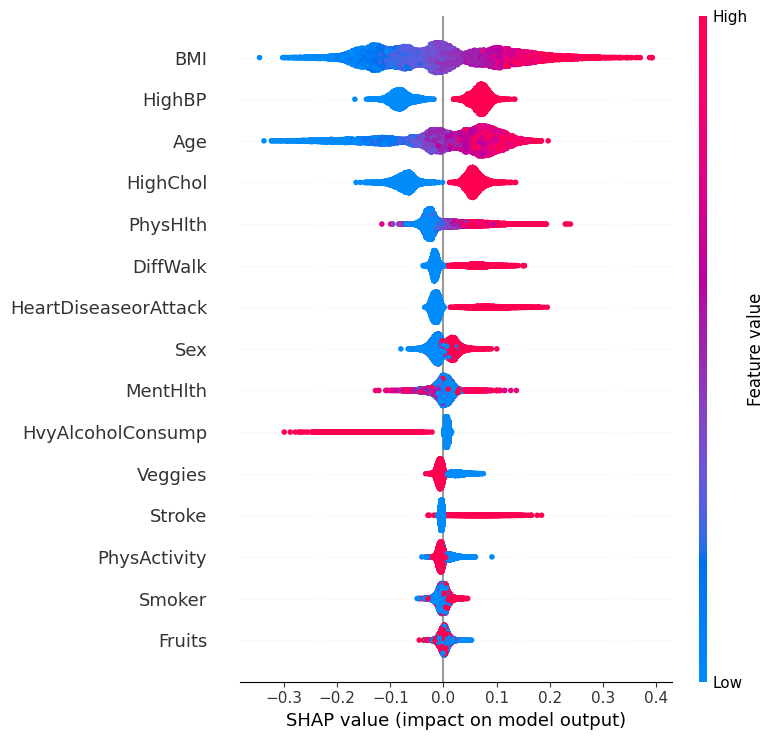

In [137]:
# Inserte c√≥digo para calcular shapley values aqu√≠

import shap

# Pasos del pipeline ya entrenado
pre   = xgb_pipeline.named_steps["pre"]  
model = xgb_pipeline.named_steps["xgb"]  

# Matrices preprocesadas y nombres
Xte = pre.transform(X_test)                       
Xtr = pre.transform(X_train)            
feat_names = Xte.columns.tolist()

# Background
bg = Xtr.sample(min(1000, len(Xtr)), random_state=42)

# Explainer: probas + interventional (esto fue necesario para evitar un error que tirabaq el codigo iniciamente)
explainer = shap.TreeExplainer(
    model,
    data=bg,
    feature_perturbation="interventional",
    model_output="probability"
)

# SHAP values en test
shap_values = explainer.shap_values(Xte.values)

# Gr√°fico resumen 
shap.summary_plot(shap_values, Xte, feature_names=feat_names, max_display=15)


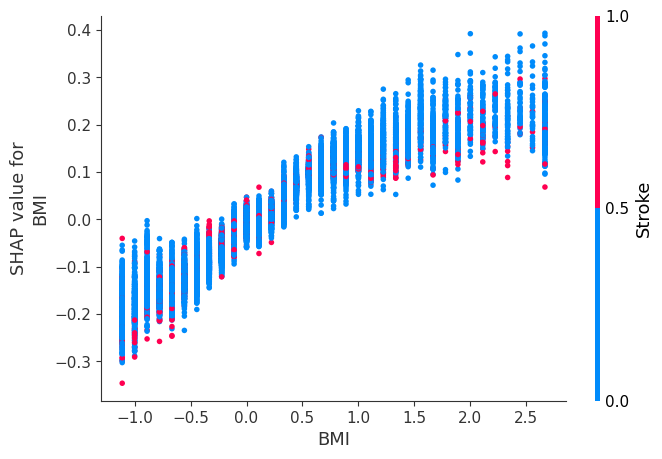

In [138]:
# Otro gr√°fico
feat_names = Xte.columns.tolist()

shap.dependence_plot(
    "BMI",               
    shap_values,     
    Xte,               
    feature_names=feat_names,
    interaction_index="Stroke" 
)

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¬øQu√© variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¬øExiste alg√∫n patr√≥n com√∫n entre las instancias analizadas? (1 punto)

  - ¬øEs posible generalizar estas conclusiones a todo el dataset? (1 punto)

Aporte local para la instancia 1:


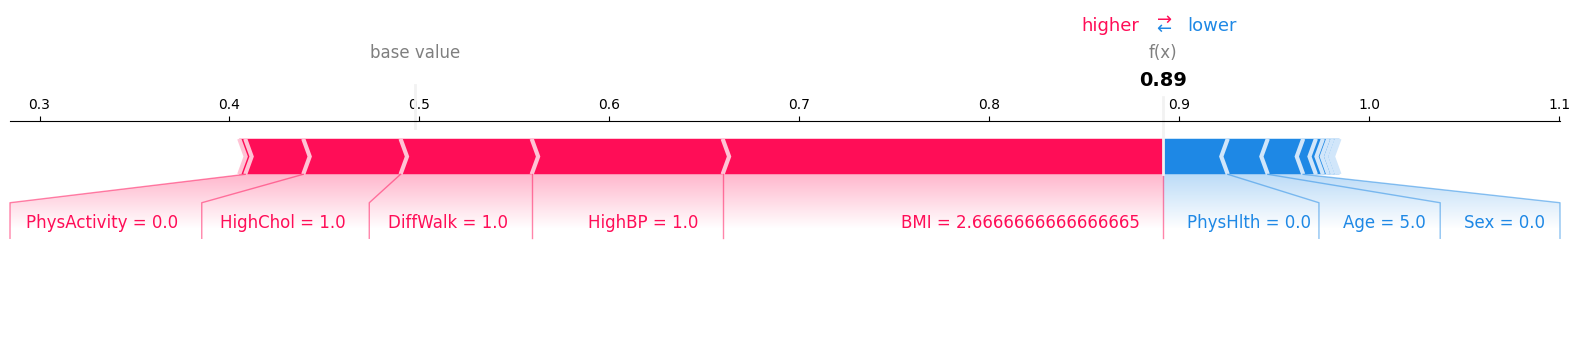

Aporte local para la instancia 9:


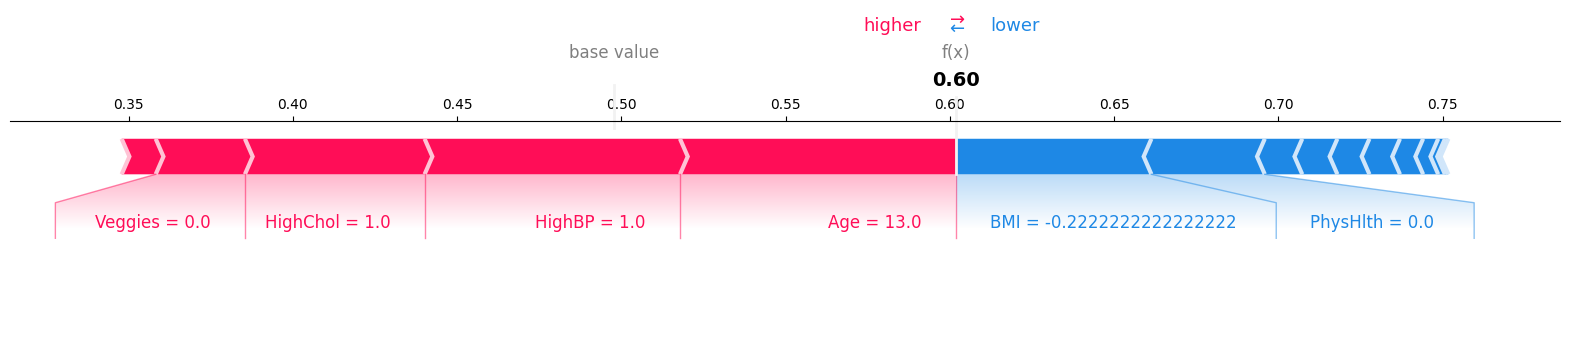

Aporte local para la instancia 150:


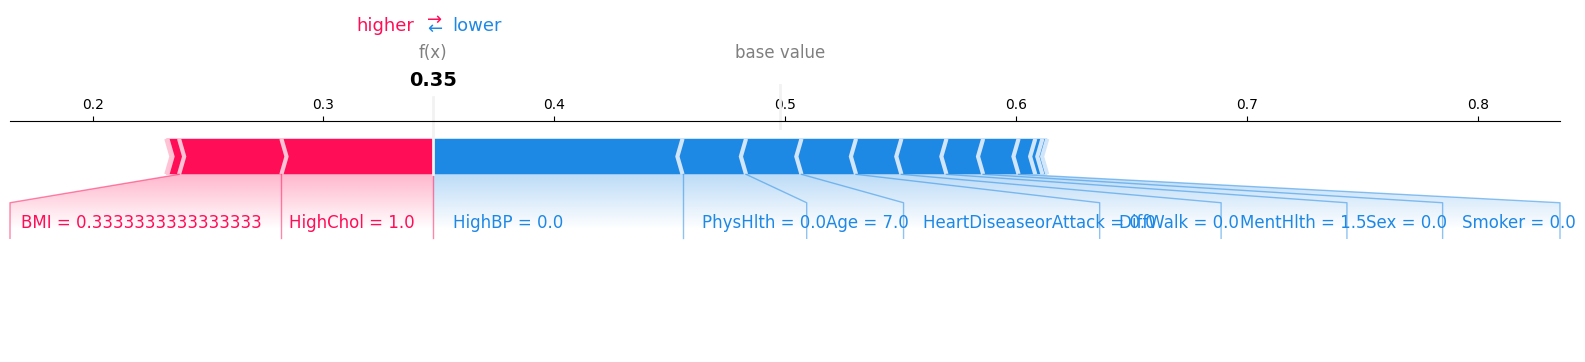

In [ ]:
# Inserte c√≥digo para generar gr√°ficos de aporte local aqu√≠

# Asegura referencias correctas
feat_names = Xte.columns.tolist()

# Soporte para salida binaria
if isinstance(shap_values, list):
    sv = shap_values[1]                       # clase positiva
    base_val = explainer.expected_value[1]
else:
    sv = shap_values
    base_val = explainer.expected_value

# Instancias por posici√≥n (iloc)
indices = [1, 9, 150]

for i in indices:
    print(f"Aporte local para la instancia {i}:")
    shap.force_plot(
        base_val,                 # valor esperado (baseline)
        sv[i],                    # shap values de la instancia i
        Xte.iloc[i],              # fila transformada correspondiente
        feature_names=feat_names,  # nombres alineados a Xte
        matplotlib=True
    )

### 5.3 Aporte global (4 puntos)

Genere ahora una visualizaci√≥n donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¬øQu√© diferencias existen con las conclusiones generadas a nivel de instancia?

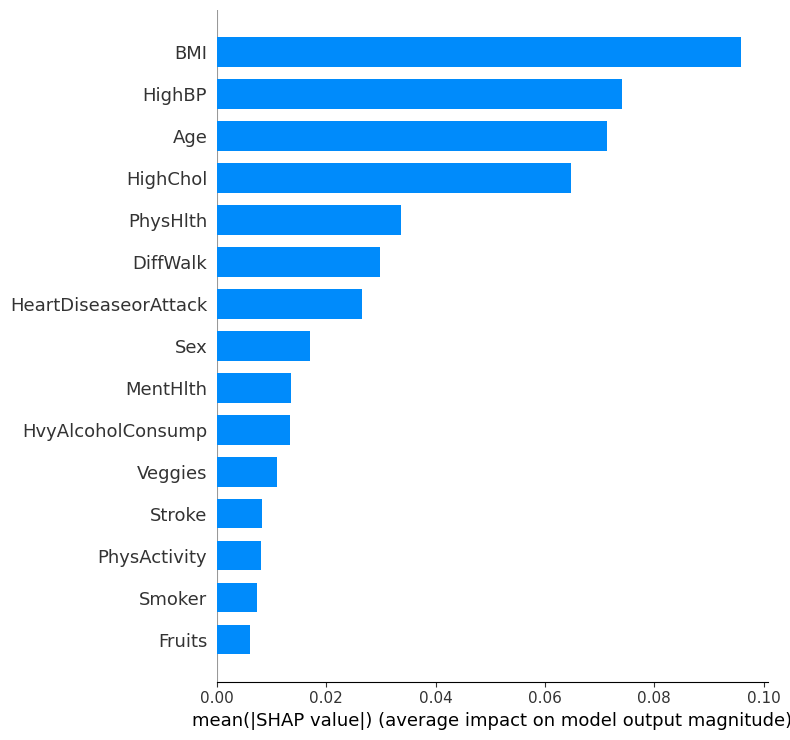

In [ ]:
# Inserte c√≥digo para generar gr√°ficos de aporte global aqu√≠

# Matriz transformada y nombres
X_test_transformed = Xte      
feat_names = X_test_transformed.columns.tolist()

# shap_values puede ser lista [neg, pos] o un array
if isinstance(shap_values, list):
    sv_global = shap_values[1]   # clase positiva
else:
    sv_global = shap_values

shap.summary_plot(
    sv_global,                   # valores SHAP
    X_test_transformed,          # features transformadas (DataFrame)
    feature_names=feat_names,    # nombres alineados a X_test_transformed
    plot_type="bar",             # importancia global por suma de |SHAP|
    max_display=15
)

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gr√°fico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¬øQu√© puede concluir de sus resultados?

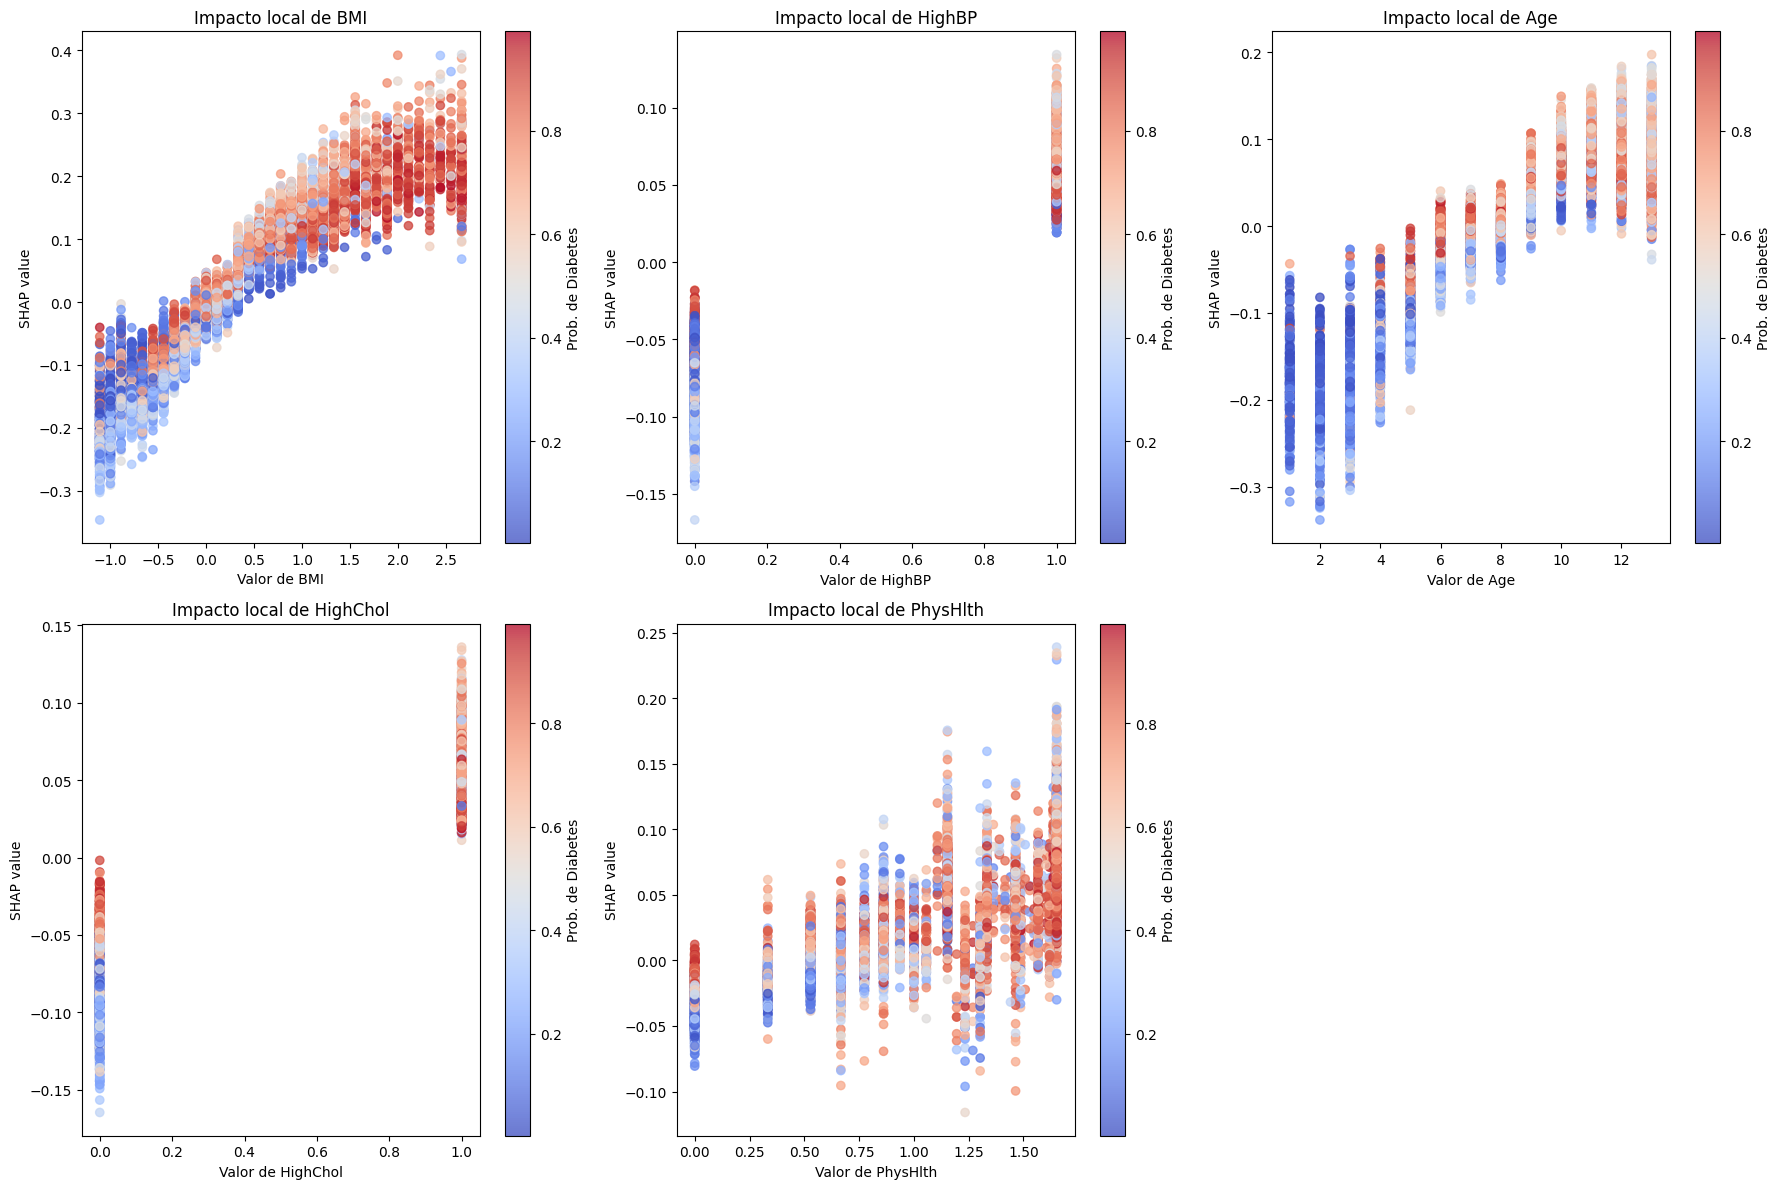

In [ ]:
# Inserte c√≥digo para generar gr√°ficos de feature vs shap value aqu√≠

# Preparaci√≥n
pre   = xgb_pipeline.named_steps["pre"]
model = xgb_pipeline.named_steps["xgb"]

Xte = pre.transform(X_test)               
feat_names = Xte.columns.tolist()

# shap_values
sv = shap_values[1] if isinstance(shap_values, list) else shap_values 

# Importancia global = media de |SHAP| por feature
mean_abs_shap = np.abs(sv).mean(axis=0)
top_idx = np.argsort(mean_abs_shap)[-5:][::-1]    # √≠ndices top 5 descendente
top_feats = [feat_names[i] for i in top_idx]

# Probabilidad de clase positiva (diabetes) para colorear
probs = xgb_pipeline.predict_proba(X_test)[:, 1]

# Scatterplots
plt.figure(figsize=(18, 12))

for k, (idx, fname) in enumerate(zip(top_idx, top_feats), start=1):
    x_vals = Xte.iloc[:, idx].values         
    y_vals = sv[:, idx]                  

    ax = plt.subplot(2, 3, k)
    sc = ax.scatter(x_vals, y_vals, c=probs, cmap="coolwarm", alpha=0.75)
    ax.set_xlabel(f"Valor de {fname}")
    ax.set_ylabel("SHAP value")
    ax.set_title(f"Impacto local de {fname}")
    plt.colorbar(sc, ax=ax, label="Prob. de Diabetes")

plt.tight_layout()
plt.show()


### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gr√°fico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¬øQu√© relaci√≥n existe entre la salida promedio del modelo y cada feature analizada? ¬øSon estas conclusiones generalizables para todo el conjunto de datos?

Top-5 (orden SHAP): ['BMI', 'HighBP', 'Age', 'HighChol', 'PhysHlth']
Top-5 usado en PDP: ['BMI', 'HighBP', 'Age', 'HighChol', 'PhysHlth']


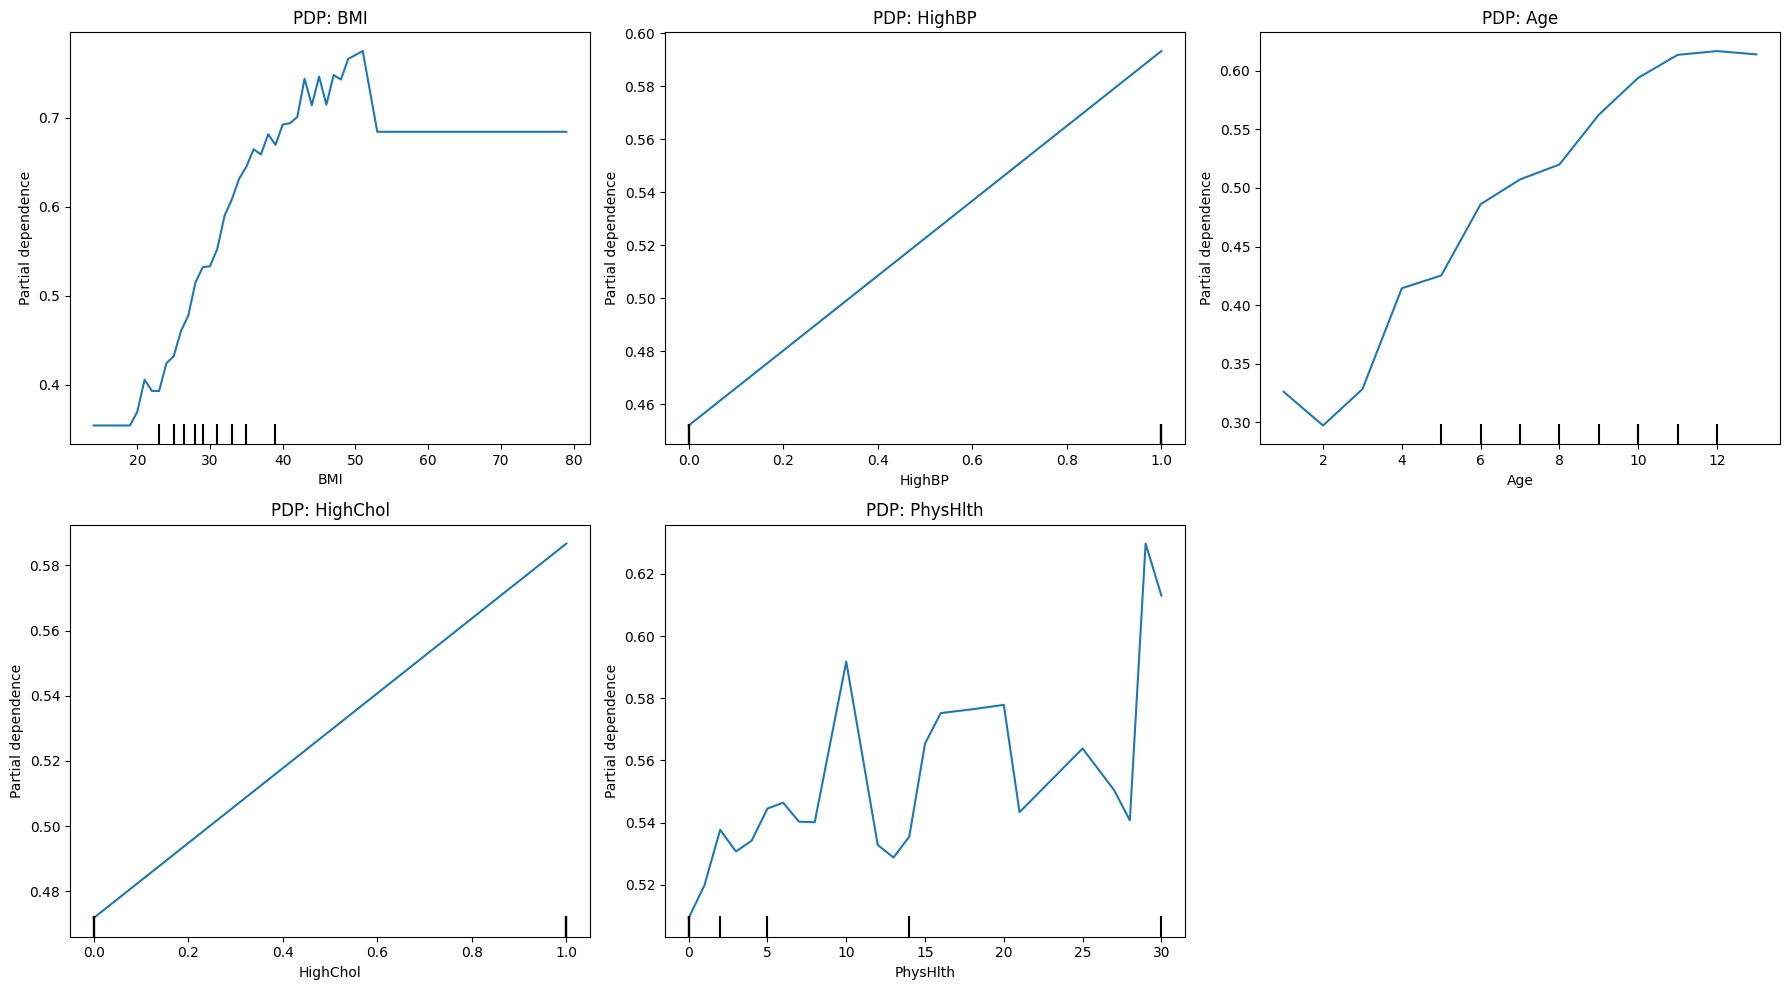

In [ ]:
# Inserte c√≥digo para generar gr√°ficos PDP aqu√≠
from sklearn.inspection import PartialDependenceDisplay

# Top 5 por impacto global SHAP (media de |SHAP|)
pre   = xgb_pipeline.named_steps["pre"]
Xte   = pre.transform(X_test)                  
feat_names = Xte.columns.tolist()

sv = shap_values[1] if isinstance(shap_values, list) else shap_values
mean_abs_shap = np.abs(sv).mean(axis=0)
top_idx = np.argsort(mean_abs_shap)[-5:][::-1]    # √≠ndices top5 descendente en Xte
top_feats_trans = [feat_names[i] for i in top_idx]

# Alinear a nombres que PDP 
top_feats_pdp = [f for f in top_feats_trans if f in X_test.columns][:5]
# confirmo que sean las mismas que el scatterplot
print("Top-5 (orden SHAP):", top_feats_trans)
print("Top-5 usado en PDP:", top_feats_pdp)


# PDP 

X_sample = X_test.sample(n=1000, random_state=42)  

fig, ax = plt.subplots(2, 3, figsize=(18, 10))
ax = ax.flatten()
for i, fname in enumerate(top_feats_pdp):
    PartialDependenceDisplay.from_estimator(
        estimator=xgb_pipeline,
        X=X_sample,
        features=[fname],
        ax=ax[i],
        kind="average",
        grid_resolution=50
    )
    ax[i].set_title(f"PDP: {fname}")
if len(top_feats_pdp) < 6:
    fig.delaxes(ax[5])
plt.tight_layout(); plt.show()

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Despu√©s de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisi√≥n tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas se√±ale a **cu√°nta poblaci√≥n** es posible explicar con estas reglas e indique la **precisi√≥n** que poseen las reglas en la totalidad de los datos. ¬øTienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta se√±alando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le ser√° √∫til extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [ ]:
!pip install alibi
!pip install alibi[ray]
!pip install --upgrade scipy


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
  Attempting uninstall: click
    Found existing installation: click 8.3.0
    Uninstalling click-8.3.0:
      Successfully uninstalled click-8.3.0



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from alibi.explainers import AnchorTabular

In [150]:
# ===== 1) Preparar matrices preprocesadas (orden y nombres correctos) =====
pre   = xgb_pipeline.named_steps["pre"]   # ColumnTransformer
model = xgb_pipeline.named_steps["xgb"]   # XGBClassifier

Xtr = pre.transform(X_train)              # DataFrame (por set_output('pandas'))
Xte = pre.transform(X_test)               # DataFrame
feat_names = Xte.columns.tolist()

# Aseguramos target como array 1D
y_tr = y_train.values if hasattr(y_train, "values") else y_train
y_te = y_test.values  if hasattr(y_test,  "values") else y_test

# Predicciones del modelo (para comparar decisiones)
y_pred_test = xgb_pipeline.predict(X_test)        # 0/1 sobre el set original (ok)

# ===== 2) Definir reglas sobre las FEATURES PREPROCESADAS =====
# Nota: BMI y Age aqu√≠ est√°n en la escala transformada de tu preprocesamiento (BMI winsorizado+robust; Age passthrough).
# Thresholds elegidos: "alto" BMI (z‚âà1) o (Age moderada-alta y HighBP=1).
def reglas_simi(df):
    return (
        (df["BMI"]  > 1.00)                      # IMC alto en escala transformada
    ) | (
        (df["Age"]  > 0.50) & (df["HighBP"] == 1)  # Edad por encima de la media y con hipertensi√≥n
    )

# Aplicaci√≥n de reglas (DataFrame preprocesado!)
mask = reglas_simi(Xte)            # pandas Series booleana (mismo √≠ndice/orden que Xte)

# ===== 3) M√©tricas solicitadas =====
# Cobertura: % de la poblaci√≥n a la que le aplican las reglas (es decir, a la que "explico")
cobertura = mask.mean()                         # proporci√≥n
poblacion_cubierta = int(mask.sum())            # cantidad

# Predicci√≥n seg√∫n reglas: positivo si cumple la(s) regla(s), negativo en caso contrario
y_rule = mask.astype(int).values                # 1 si regla True, 0 si False

# Precisi√≥n de las reglas EN LA TOTALIDAD DE LOS DATOS (PPV de y_rule)
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

precision_global = precision_score(y_te, y_rule, zero_division=0)
accuracy_global  = accuracy_score(y_te, y_rule)
cm = confusion_matrix(y_te, y_rule)

# (Opcional, a veces piden) Precisi√≥n dentro del subconjunto cubierto por reglas
# Es simplemente el % de verdaderos positivos dentro de los que cumplen regla.
precision_en_cubiertos = (y_te[mask.values] == 1).mean() if mask.any() else float("nan")

print(f"Cobertura de las reglas: {cobertura*100:.2f}%  (n={poblacion_cubierta} de {len(Xte)})")
print(f"Precisi√≥n GLOBAL de las reglas (PPV sobre todo el set): {precision_global*100:.2f}%")
print(f"Accuracy GLOBAL de las reglas: {accuracy_global*100:.2f}%")
print("Matriz de confusi√≥n (y_real vs y_regla):\n", cm)
print(f"Precisi√≥n SOLO entre cubiertos por reglas: {precision_en_cubiertos*100:.2f}%")

# ===== 4) Explicar las observaciones pedidas (√≠ndices POSICIONALES del set de test) =====
for idx in [1000, 3001, 5751]:
    cumple = bool(mask.iloc[idx])
    pred_modelo = int(y_pred_test[idx])
    pred_regla  = int(cumple)                 # lo que dir√≠a el sistema de reglas
    print(f"Obs {idx} | Cumple regla: {cumple} | Predicci√≥n REGLA: {pred_regla} | Predicci√≥n MODELO: {pred_modelo} | y_real: {int(y_te[idx])}")


Cobertura de las reglas: 60.42%  (n=12764 de 21127)
Precisi√≥n GLOBAL de las reglas (PPV sobre todo el set): 66.62%
Accuracy GLOBAL de las reglas: 67.92%
Matriz de confusi√≥n (y_real vs y_regla):
 [[5845 4260]
 [2518 8504]]
Precisi√≥n SOLO entre cubiertos por reglas: 66.62%
Obs 1000 | Cumple regla: False | Predicci√≥n REGLA: 0 | Predicci√≥n MODELO: 0 | y_real: 0
Obs 3001 | Cumple regla: True | Predicci√≥n REGLA: 1 | Predicci√≥n MODELO: 1 | y_real: 1
Obs 5751 | Cumple regla: False | Predicci√≥n REGLA: 0 | Predicci√≥n MODELO: 0 | y_real: 0


# Retrospectiva... (10 puntos)

En base a los diferentes m√©todos que implementa y ha comentado en este laboratorio, comente qu√© m√©todos le permiten entregar mejores conclusiones para la tarea de clasificaci√≥n de diabetes. Por otro lado, ¬øqu√© m√©todos son m√°s √∫tiles para el problema del doctor Simi, m√©todos agnosticos locales o globales?

> Fundamente su Respuesta aqu√≠

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>